#Causal Assumptions
Authors: Megha Patel
![image](https://github.com/meghamkpatel/INFO_7390_Art_and_Science_of_Data/assets/32498703/a129f0ad-2653-42ab-a5fd-e2c26d23b518)

##Abstract

Let's check for causal assumptions in another context. In this notebook, we will"Heart Disease UCI" dataset from Kaggle. This dataset is a well-known dataset commonly used for classification and predictive modeling tasks related to heart disease diagnosis. The dataset is often used for binary classification tasks, where the goal is to predict the presence or absence of heart disease based on the given features. Researchers and machine learning practitioners use this dataset to explore various classification algorithms and assess their performance in predicting heart disease.

Reference: https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci

![image](https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/assets/32498703/2b6fa5ca-fe84-4dd9-968b-72c359d331a5)

#The Data:

* Age: Age of the patient.
* Sex: Gender of the patient (0 = female, 1 = male).
* CP (Chest Pain Type):
  * 0: Typical angina
  * 1: Atypical angina
  * 2: Non-anginal pain
  * 3: Asymptomatic
* Trestbps (Resting Blood Pressure): Resting blood pressure in mm Hg.
* Chol (Serum Cholesterol): Serum cholesterol in mg/dl.
* Fbs (Fasting Blood Sugar):
  * 0: Fasting blood sugar < 120 mg/dl
  * 1: Fasting blood sugar > 120 mg/dl
* Restecg (Resting Electrocardiographic Results):
  * 0: Normal
  * 1: Having ST-T wave abnormality
  * 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
* Thalach (Maximum Heart Rate Achieved): Maximum heart rate achieved during the exercise test.
* Exang (Exercise-Induced Angina):
  * 0: No
  * 1: Yes
* Oldpeak (ST Depression Induced by Exercise Relative to Rest): ST depression induced by exercise relative to rest.
* Slope (Slope of the Peak Exercise ST Segment):
  * 0: Upsloping
  * 1: Flat
  * 2: Downsloping
* Ca (Number of Major Vessels Colored by Fluoroscopy): Number of major vessels colored by fluoroscopy.
* Thal (Thalassemia):
  * 0: Normal
  * 1: Fixed defect
  * 2: Reversible defect
* Target (Presence of Heart Disease):
  * 0: No heart disease
  * 1: Presence of heart disease

##Table of Contents
1. [Abstract](https://)
2. [Introduction](#scrollTo=4R9sz0yAl8cO)
3. [SUTVA](#scrollTo=AdNmw1rVUA3l)
4. [Consistency](#scrollTo=bTGTqkBWEYTk)
5. [Ignorability](#scrollTo=ToaAXqkgETXQ)
6. [Positivity](#scrollTo=PNIv5PHhEgqM)
7. [Conclusion](#scrollTo=_rRu313UEpAG)
8. [References](https://)
9. [License](https://)

#Getting our Data

First, let's download our dataset and check for any missing data.

In [1]:
!git clone https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data.git

Cloning into 'INFO_7390_Art_and_Science_of_Data'...
remote: Enumerating objects: 51790, done.
remote: Counting objects: 100% (1788/1788), done.
remote: Compressing objects: 100% (1044/1044), done.
remote: Total 51790 (delta 891), reused 1540 (delta 727), pack-reused 50002
Receiving objects: 100% (51790/51790), 682.46 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (893/893), done.
Updating files: 100% (50334/50334), done.


In [2]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv("/content/INFO_7390_Art_and_Science_of_Data/CSV/heart.csv")

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We see that there are no missing data values and the ranges for each value make sense.

#SUTVA - Stable Unit Treatment Value Assumption

SUTVA assumes that the treatment assignment to one unit does not affect the potential outcomes of other units, and there is no interference or spillover of treatment effects between units.

Unit in SUTVA refers to the individual entities or observational units within a study. These units could be individuals, households, organizations, or any entities under observation. Treatment value represents the specific level or condition of the treatment variable applied to a unit. For example, in a randomized experiment, a unit is either assigned to the treatment group or the control group, and the treatment value indicates the specific treatment that a unit receives.

In practice, checking SUTVA involves assessing whether the treatment effect in one group is consistent across different levels of treatment assigned to other units.







###Example
In the context of the Heart Disease UCI dataset, we can use the 'sex' variable as the treatment assignment and 'thalach' (maximum heart rate achieved) as the outcome variable. We'll check for the Stable Unit Treatment Value Assumption (SUTVA) by comparing the treatment effect in the treated group (sex=1) with the control group (sex=0). Here's a code example:

In [5]:
# Assuming 'sex' is the treatment variable and 'thalach' is the outcome variable
treatment_group_heart = data[data['sex'] == 1]['thalach']
control_group_heart = data[data['sex'] == 0]['thalach']

# Check for interference by comparing the treatment effect in each group
treatment_effect_treated_heart = treatment_group_heart.mean()
treatment_effect_control_heart = control_group_heart.mean()

print(f"Treatment Effect in Male Group (sex=1): {treatment_effect_treated_heart}")
print(f"Treatment Effect in Female Group (sex=0): {treatment_effect_control_heart}")

Treatment Effect in Male Group (sex=1): 148.96135265700482
Treatment Effect in Female Group (sex=0): 151.125


In this example, we are using linear regression to estimate the treatment effect (impact of being male on maximum heart rate achieved) for the entire dataset. We then compare the predicted treatment effects for the male group and female group. If SUTVA holds, the treatment effect in the male group should not be influenced by the treatment assignment in the female group, and vice versa.

We observe a difference of 3 units in the average (or mean) between two groups which suggests that, on average, the members of one group have a higher or lower value than the members of the other group by 3 units. Based on the context of the dataset, we can rule that the difference is substantial and being a female would lead to a higher chance of heart disease.

#Consistency

Consistency in causal inference implies  the stability and reliability of treatment effects across different conditions and populations. In simple terms, consistency ensures that the estimated impact of a treatment is reliable and does not fluctuate when analyzed across different groups or conditions. It emphasizes the uniformity of treatment effects within the studied population. This section will elaborate on the theoretical foundations of consistency, its significance in causal inference, and provide insights practical considerations.

Consistency, in the context of causality, refers to the idea that the estimated treatment effect from a study converges to the true treatment effect as the sample size increases. It ensures that, under the same experimental or observational conditions, the estimated effects are reliable and not influenced by random variability.




###Example
For demonstrating consistency using the Medical Cost Personal Dataset, we can use a simple linear regression model to estimate the treatment effect. In this case, let's consider 'smoker' as the binary treatment variable and 'charges' as the continuous outcome variable. The idea is to check if the estimated treatment effect remains consistent across different subgroups.



In [6]:
# Assuming 'sex' is the treatment variable and 'thalach' is the outcome variable
model_heart = sm.OLS(data['thalach'], sm.add_constant(data['sex'])).fit()

# Check consistency across different subgroups (e.g., 'cp', 'restecg')
subgroups_heart = ['cp', 'restecg']  # Replace with relevant categorical variables in your dataset

for subgroup_var_heart in subgroups_heart:
    # Check consistency within each subgroup
    for subgroup_value_heart in data[subgroup_var_heart].unique():
        subgroup_data_heart = data[data[subgroup_var_heart] == subgroup_value_heart]
        subgroup_effect_heart = model_heart.predict(sm.add_constant(subgroup_data_heart['sex'])).mean()

        print(f"Estimated Treatment Effect in {subgroup_var_heart} = {subgroup_value_heart}: {subgroup_effect_heart}")

Estimated Treatment Effect in cp = 3: 149.33763915143874
Estimated Treatment Effect in cp = 2: 149.8317854961408
Estimated Treatment Effect in cp = 1: 149.7402657004831
Estimated Treatment Effect in cp = 0: 149.5514382960035
Estimated Treatment Effect in restecg = 0: 149.60897499096257
Estimated Treatment Effect in restecg = 1: 149.6588442346809
Estimated Treatment Effect in restecg = 2: 150.58408816425123


We use a linear regression model to estimate the treatment effect (impact of being male on maximum heart rate achieved) for the entire dataset. We then check whether this effect remains consistent across different subgroups defined by categorical variables such as 'cp' and 'restecg'.

Consistency is supported if the estimated treatment effects are relatively stable across various subgroups, which in this example indicates that the impact of heart disease is consistent within chest pain and Resting Electrocardiographic Results categories.

#Ignorability

Ignorability, also known as the unconfoundedness assumption, is a pivotal concept in causal inference that ensures the validity of estimating causal effects. This section will delve into the theoretical foundations of ignorability, its significance in causal modeling, and practical considerations for adhering to this crucial assumption.

The ignorability assumption says that, conditional on observed covariates, the treatment assignment is independent of potential outcomes. In simpler terms, given the available information about the observed variables, there are no unobserved confounders influencing both the treatment assignment and the outcome variable.

###Example

To illustrate ignorability in the context of causal inference using the Heart Disease UCI dataset, let's use the 'sex' variable as the treatment variable, and 'thalach' (maximum heart rate achieved) as the outcome variable. We'll check for ignorability by examining whether the treatment assignment (being male) is independent of potential outcomes after accounting for other observed covariates. The goal is to check if, conditional on the observed covariates, the treatment assignment is independent of potential outcomes.

In [10]:
import statsmodels.api as sm

# Assuming 'sex' is the treatment variable and 'thalach' is the outcome variable
treatment_variable_heart = 'sex'
outcome_variable_heart = 'thalach'

# Select relevant covariates (adjust based on your dataset)
covariates_heart = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a design matrix including treatment, outcome, and covariates
design_matrix_heart = sm.add_constant(data[[treatment_variable_heart] + [outcome_variable_heart] + covariates_heart])

# Fit a regression model
model_heart = sm.OLS(design_matrix_heart[outcome_variable_heart], design_matrix_heart[[treatment_variable_heart] + covariates_heart]).fit()

# Check for ignorability
print(model_heart.summary())


                                 OLS Regression Results                                
Dep. Variable:                thalach   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1012.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):                   2.75e-229
Time:                        22:41:20   Log-Likelihood:                         -1382.0
No. Observations:                 303   AIC:                                      2788.
Df Residuals:                     291   BIC:                                      2833.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In this example, we include various covariates (such as age, chest pain type, resting blood pressure, etc.) in the regression model to account for potential confounding. The residuals from this model are then regressed against the treatment variable ('sex') to check for ignorability. If the coefficient for 'sex' is not significantly different from zero, it suggests that, conditional on the observed covariates, the treatment assignment is independent of potential outcomes. In this example, the p-value looks close to 0 and the mean does not overlap (0.025 to 0.975). Therefore, we can say that heart disease is conditional to sex.

#Positivity
Positivity, also known as the "common support" or "overlap" assumption, is a critical concept in causal inference that ensures the existence of a non-zero probability for all units to receive any level of treatment. This section will delve into the theoretical foundations of positivity, its significance in causal modeling, and practical considerations for addressing challenges associated with this assumption. Positivity asserts that, for every possible combination of observed covariates, there exists a non-zero probability of receiving both treatment and control. In simpler terms, it implies that there are no groups or individuals in the population that are completely excluded from the possibility of getting a particular treatment or exposure.





###Example
Consider a study investigating the impact of a new educational program on student performance. Positivity would be satisfied if, for any combination of student characteristics (such as socioeconomic status, learning style, etc.), there is a non-zero probability that the student could be assigned to either the treatment or control group.

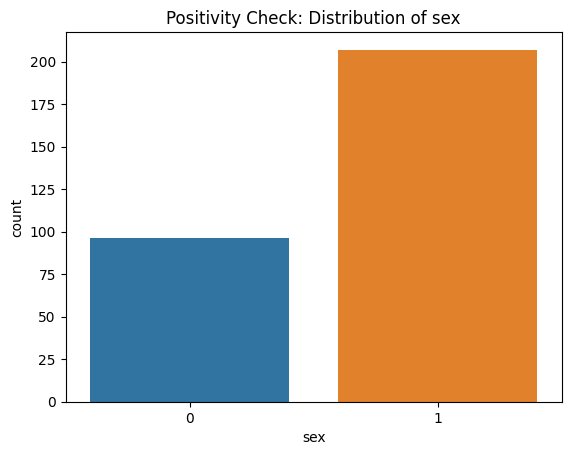

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sex' is the treatment variable
treatment_variable = 'sex'

# Check the distribution of the treatment variable
sns.countplot(x=treatment_variable, data=data)
plt.title(f"Positivity Check: Distribution of {treatment_variable}")
plt.show()


In this example, we use a countplot to visualize the distribution of the 'sex' variable, which serves as the treatment variable. The plot will show the counts of each category ('0' and '1' for female and male, respectively).
Positivity is supported if the plot shows a reasonable distribution of treatment levels across different values of the observed covariate. This ensures that each subgroup has representation across all levels of the treatment variable.
Here we see an uneven distribution between male and female so there is an unequal representation of gender.

#Conclusion
In conclusion, this paper has undertaken a comprehensive exploration of causality assumptions and their pivotal role in the field of data science through the example of the Heart Disease dataset. Understanding and carefully considering these assumptions are fundamental for researchers seeking to draw meaningful and reliable conclusions about cause-and-effect relationships from observational data. The discussion has highlighted the inherent challenges in establishing causality. The integration of hands-on examples aims to illustrate the complexities of causal inference, fostering a more nuanced and informed approach to drawing causal relationships from observational data.

# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://journals.lww.com/epidem/fulltext/2009/01000/the_consistency_statement_in_causal_inference__a.3.aspx#:~:text=Three%20assumptions%20sufficient%20to%20identify,measurement%20of%20the%20outcome%E2%80%9D).
5. https://www.youtube.com/watch?v=wFpUKGNgb0Y
6. https://clas.ucdenver.edu/marcelo-perraillon/sites/default/files/attached-files/w2_causal_inference_perraillon.pdf
7. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4912021/#:~:text=The%20consistency%20assumption%20implies%20that,be%20observed%20for%20that%20person.
8. https://medium.com/@EpiEllie/positivity-what-it-is-and-why-it-matters-for-data-science-d5e9c0bc1fcb#:~:text=So%2C%20in%20summary%2C%20positivity%20in,study%20or%20our%20target%20pop.

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently.

#License
Copyright (c) 2023 meghamkpatel

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

